# DS_Task_01

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

##### IMPORTING LIBRARIES

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading csv file

In [54]:
df=pd.read_csv("titanic.csv")

In [55]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [56]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


##### Shape and Detail of dataset

In [57]:
df.shape

(891, 12)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Checking for null and duplicates values and Removing them

In [60]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
df.drop(columns="Cabin",axis=1,inplace=True)

In [62]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [63]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [64]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [65]:
df.duplicated().sum()

0

## `Summary`
### - All missing values are treated and no duplicated records are present 

# Analysis of Survival Rates through Visualization

## - Distribution and Proportion of Survival Status

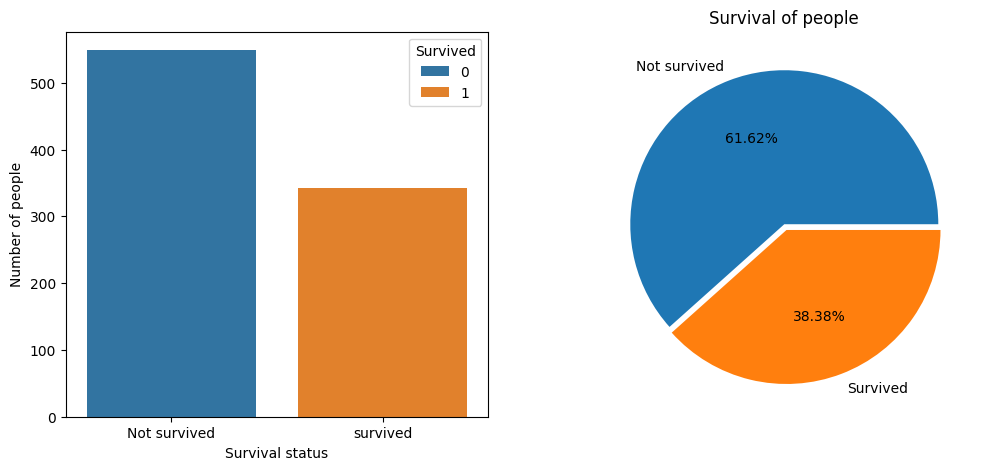

In [83]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Survived',hue="Survived",data=df)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])

plt.subplot(1, 2, 2)
plt.pie(df['Survived'].value_counts(),explode=[0,0.04],autopct="%1.2f%%",labels=['Not survived','Survived'])
plt.title("Survival of people")
plt.show()

## Survival Rate by  Sex , Class and Embarked

## - Bar plot for Survived by Sex

*`Sex` - Gender of Passenger*

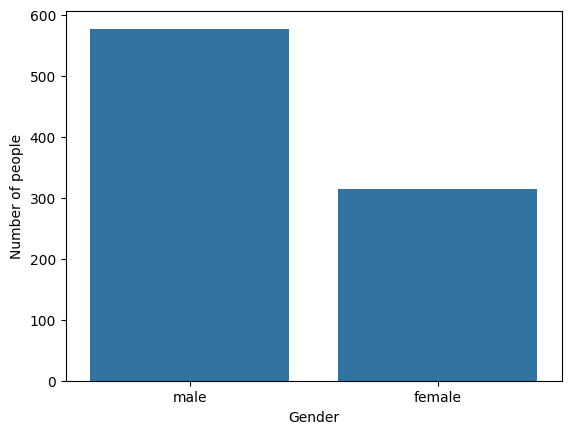

In [104]:
# Total number of People by gender

sns.countplot(x='Sex',data=df)
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.show()

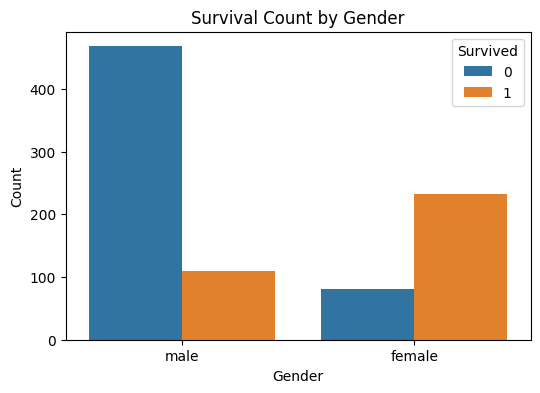

In [73]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### - Male and Female Survival rate

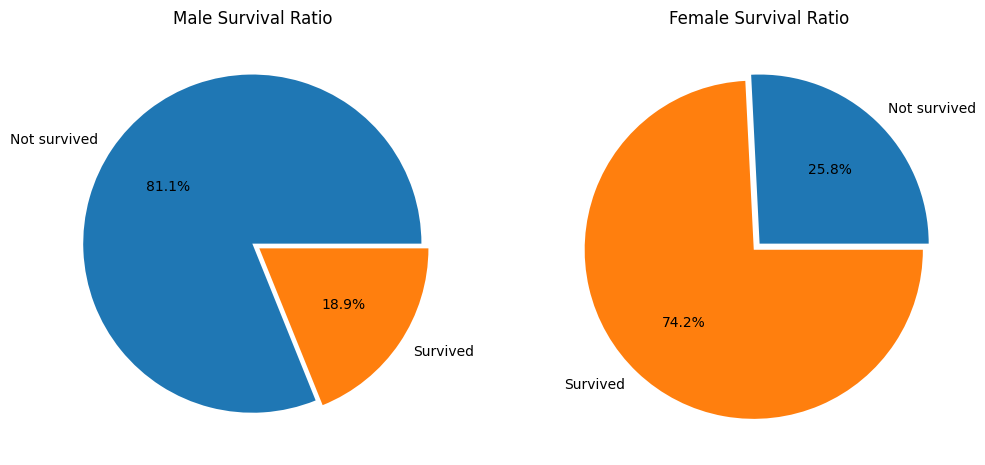

In [103]:
x=df[df['Sex'] == 'male'].Survived.groupby(df.Survived).count()
y=df[df['Sex']=='female'].Survived.groupby(df.Survived).count()
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.pie(x,explode=[0,0.05],autopct="%1.1f%%",labels=['Not survived','Survived'])
plt.title("Male Survival Ratio")

plt.subplot(1,2,2)
plt.pie(y,explode=[0,0.05],autopct="%1.1f%%",labels=['Not survived','Survived'])
plt.title("Female Survival Ratio")
plt.show()

### `Observation:`
- #### Survival rate for female was much higher in comparison to male

## - Bar plot for Survived by Pclass

*`P Class` - The class passengers travelled in*

**Pclass:** A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower 

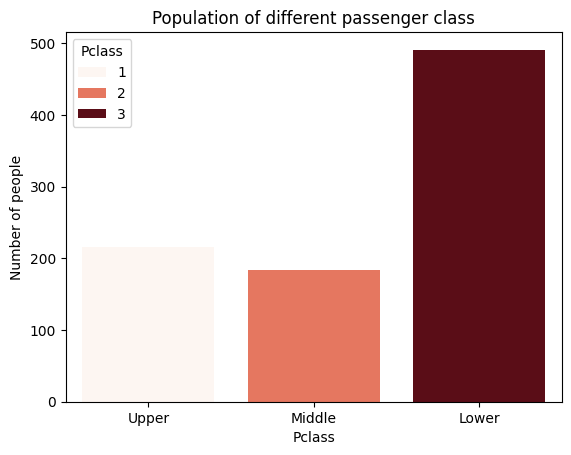

In [118]:
sns.countplot(x='Pclass',data=df,hue='Pclass',palette='Reds')
plt.title('Population of different passenger class')
plt.xlabel("Pclass")
plt.xticks(ticks=[0, 1, 2], labels=['Upper', 'Middle', 'Lower'])
plt.ylabel("Number of people")
plt.show()

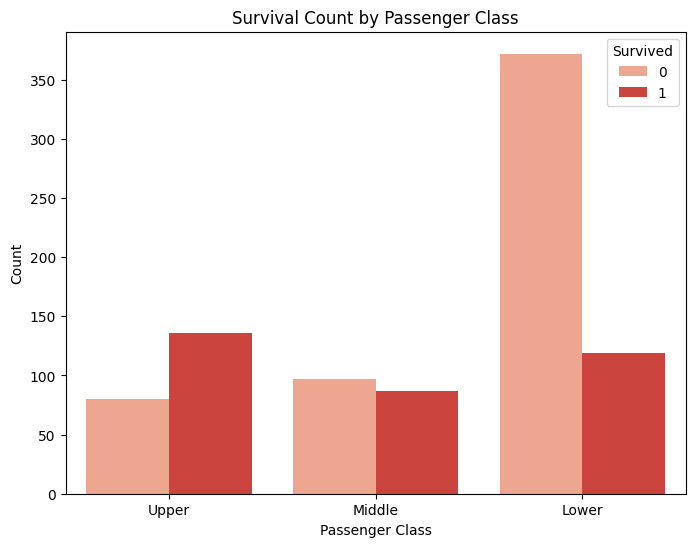

In [119]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df,palette="Reds")
plt.xticks(ticks=[0, 1, 2], labels=['Upper', 'Middle', 'Lower'])
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

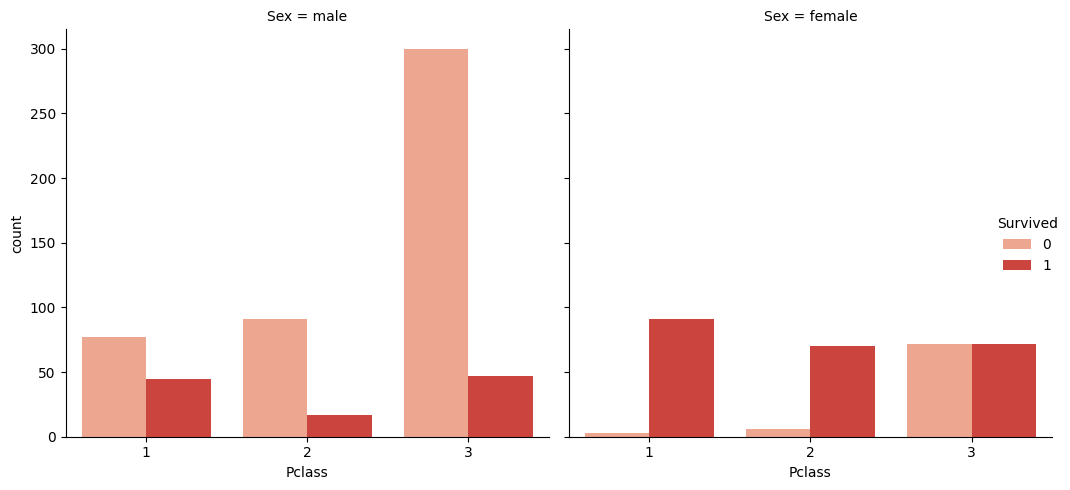

In [117]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data =df,palette="Reds" )
plt.tight_layout()

### `Observation:`

- #### Despite having the highest population, P class 3 had the lowest survival rate.
- #### Males in P class 3 exhibited the lowest survival rate.








## - Bar plot for Survived by Embarked

*`Embarked` - Point of embarkation*
- C = Cherbourg 
- Q = Queenstown 
- S = Southampton

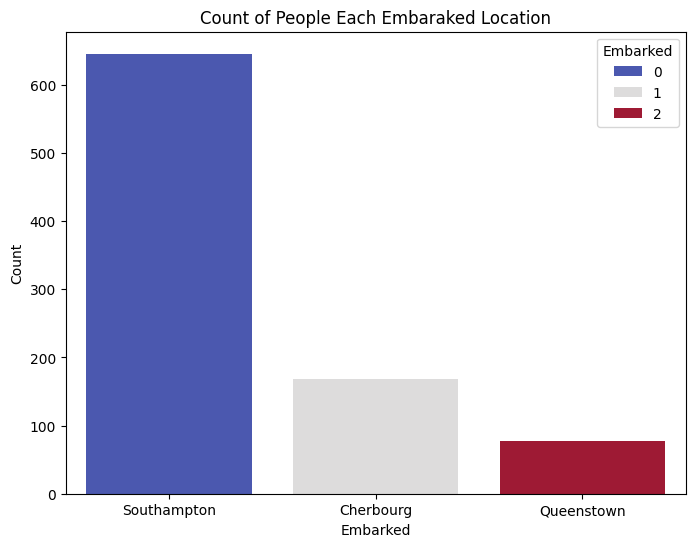

In [187]:
plt.figure(figsize=(8,6))
plt.title("Count of People Each Embaraked Location")
sns.countplot(x="Embarked",hue='Embarked',data=df,palette='coolwarm')
plt.xticks(ticks=[0,1,2],labels=['Southampton','Cherbourg','Queenstown'])
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


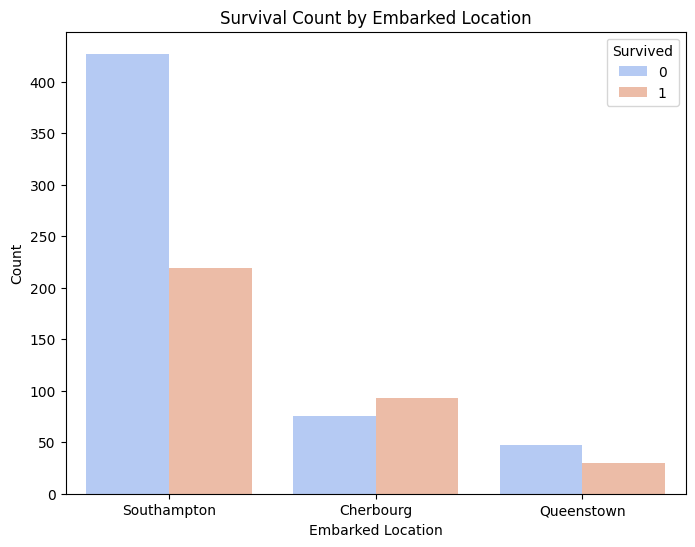

In [185]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=df,palette='coolwarm')
plt.title('Survival Count by Embarked Location')
plt.xticks(ticks=[0,1,2],labels=['Southampton','Cherbourg','Queenstown'])
plt.xlabel('Embarked Location')
plt.ylabel('Count')
plt.show()


## - Bar plot of Survival population of Sibsp and Parch

- #### `Sibsp` - # of siblings / spouses aboard the Titanic
- #### `Parch` - # of parents / children aboard the Titanic 

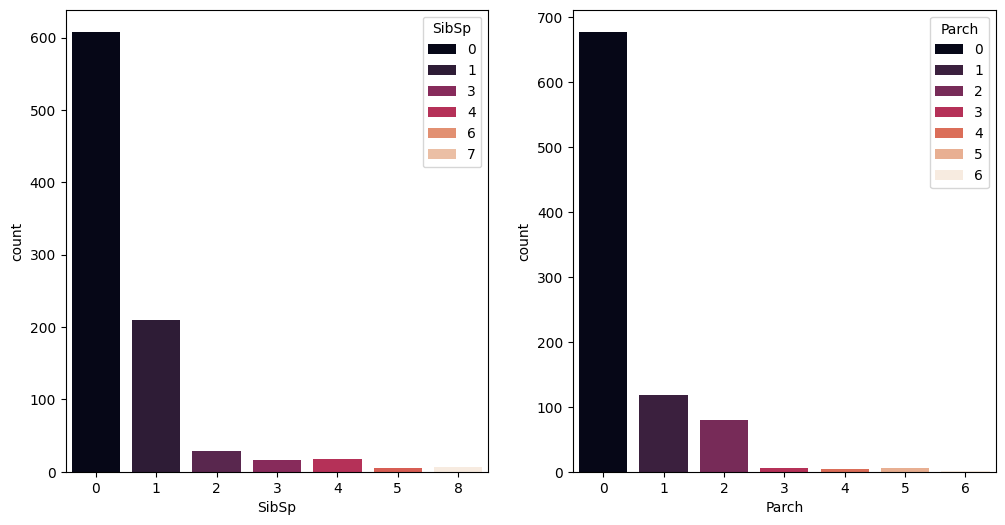

In [130]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='SibSp',data=df,ax=axes[0],hue='SibSp',palette='rocket')
sns.countplot(x='Parch',data=df,ax=axes[1],hue='Parch',palette='rocket')
plt.show()

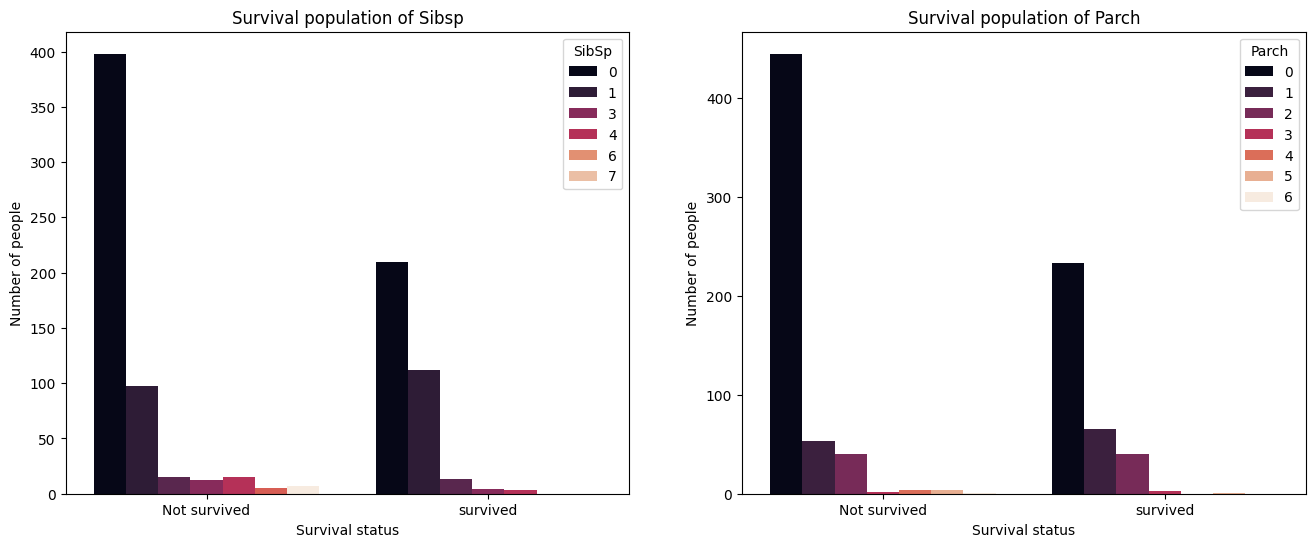

In [145]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x ='Survived', hue='SibSp',data=df,palette='rocket')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.title("Survival population of Sibsp")
plt.subplot(1,2,2)
sns.countplot(x ='Survived',hue='Parch',data=df,palette='rocket')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.title("Survival population of Parch")
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.show()

## Distribution of Fare and age

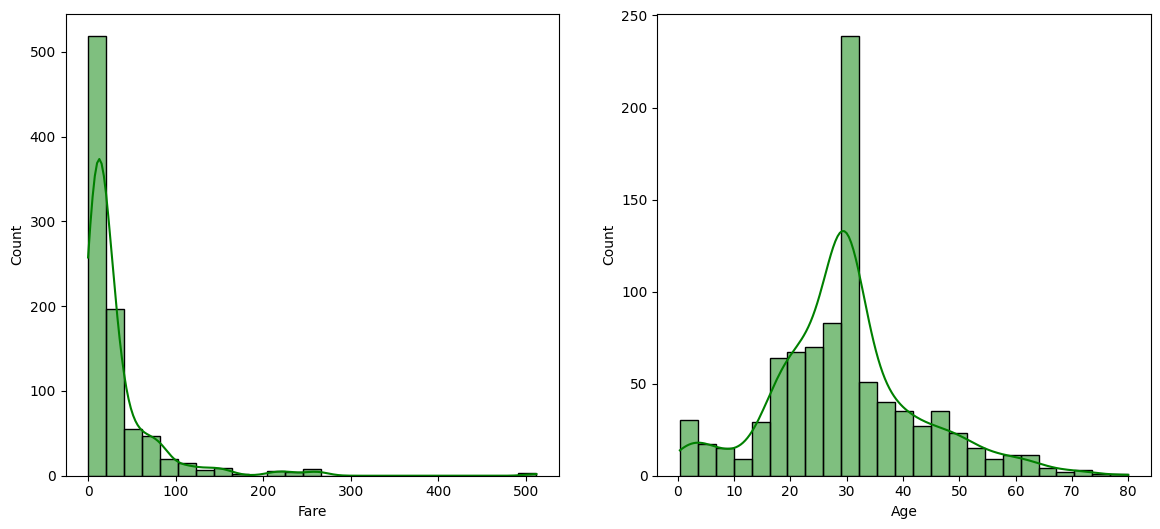

In [183]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.histplot(df['Fare'], bins=25,kde=True,color='green')
plt.subplot(1,2,2)
sns.histplot(df['Age'],bins=25,kde=True,color='green')
plt.show()

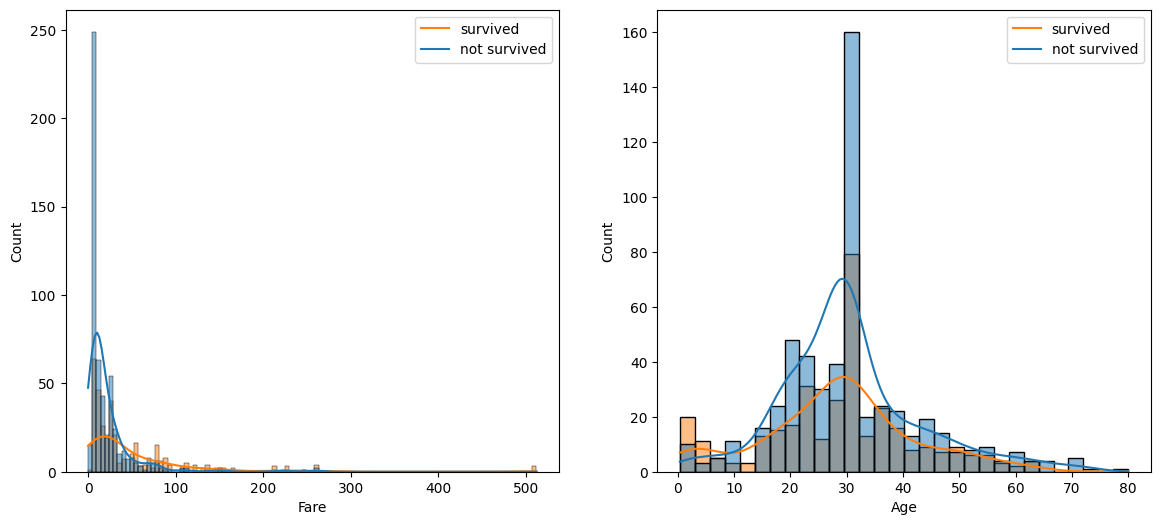

In [176]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(x='Fare',hue='Survived',data=df,kde=True)
plt.legend(labels=['survived','not survived'])
plt.subplot(1,2,2)
sns.histplot(x='Age',hue='Survived',data=df,kde=True)
plt.legend(labels=['survived','not survived'])
plt.show()

## Visualizing Survival Across Different Age Categories

Text(0, 0.5, 'Number Of People')

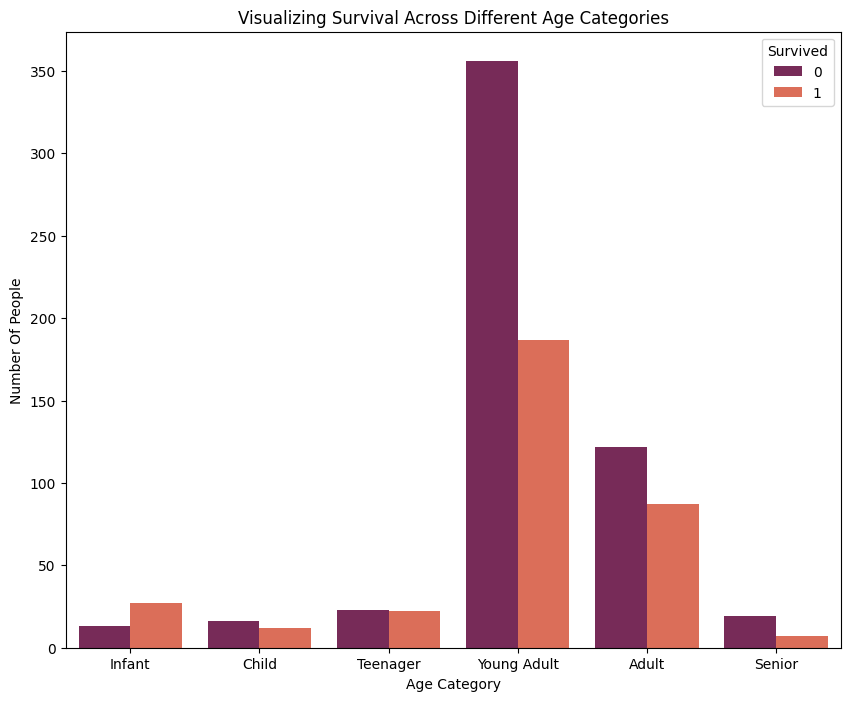

In [181]:
cuts=[ 0, 5, 12, 18, 35, 60, 100]
category=[ 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']
df['Age_Category']=pd.cut(df['Age'],bins=cuts,labels=category,right=False)
plt.figure(figsize=(10,8))
plt.title("Visualizing Survival Across Different Age Categories")
sns.countplot(x='Age_Category', hue='Survived', data=df,palette='rocket')
plt.xlabel("Age Category")
plt.ylabel("Number Of People")


### `Observation:`
   - #### Young adult had the least survival rate

## Checking for correlation

In [178]:
df.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,Adult


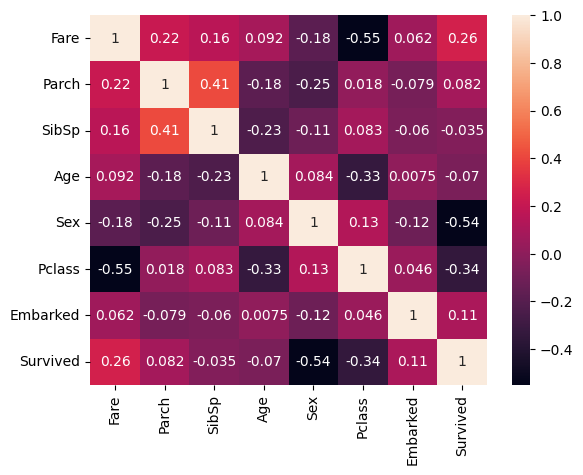

In [179]:
df_num = df[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]
sns.heatmap(df_num.corr(),annot=True)
plt.show()

### `Observation`
-  **Sex** has the strongest negative correlation with "Survived" (-0.54), meaning that gender has a significant inverse relationship with survival (likely indicating that females had a higher survival rate).
- **Fare** has a positive correlation of 0.26 with "Survived," suggesting that passengers who paid higher fares had a better chance of survival.
-  **Pclass** has a correlation of -0.34 with "Survived," meaning that those in lower classes (higher Pclass values) were less likely to survive.

### `Conclusion:`

1. **Gender Disparity**: Females had a significantly higher survival rate compared to males. This aligns with the "women and children first" protocol followed during the Titanic disaster, reflecting the societal norms at the time that prioritized the safety of women and children.

2. **Passenger Class Disparity**: Despite Class 3 having the highest number of passengers, it recorded the lowest survival rate. This suggests a correlation between socio-economic status and survival, with higher-class passengers likely having better access to lifeboats and other resources during the evacuation.

3. **Interaction Between Gender and Passenger Class**: Further analysis shows that males from Class 3 had the lowest survival rate, indicating a combined effect of gender and socio-economic status, where lower-class male passengers faced the greatest risk of not surviving.

4. **Age Factor**: Young adults had the lowest survival rate, suggesting that age influenced survival outcomes. This could be due to the "women and children first" policy, where younger individuals were prioritized during the evacuation.

5. **Correlation with the Survived Column**: Variables such as fare, sex, passenger class (Pclass), and embarkation point (Embarked) show significant correlations with survival, highlighting the importance of these factors in determining survival chances during the Titanic disaster.